In [13]:
from helpers import corner_utils
from helpers import ocr_helpers
from helpers import image_utils
import cv2
import numpy as np
import os
import glob
import pandas as pd
from shutil import copyfile
from pprint import pprint

In [14]:
path = '/home/pot/Desktop/project/web-scan/test_data/pre_train'
images = glob.glob(path + '/*jpg')

In [19]:
def get_corner_of_discharge_record(img):
    edges_image = corner_utils.edges_det(img)
    edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
    page_contour =  corner_utils.find_page_contours(edges_image)
    page_contour =  corner_utils.four_corners_sort(page_contour)
    crop_image = corner_utils.persp_transform(img, page_contour)
#     image = ocr_helpers.resize(crop_image)
    image = np.asarray(image)
    return image

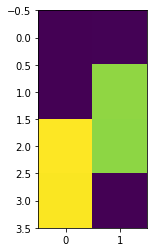

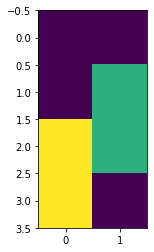

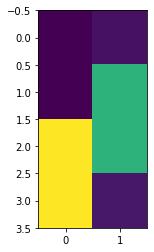

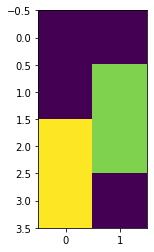

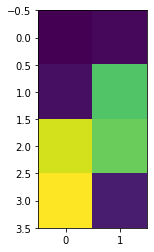

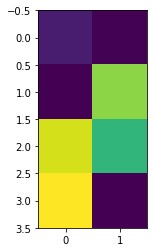

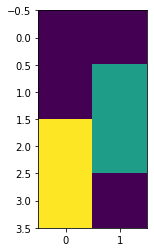

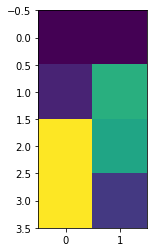

error: OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [20]:
for img in images:
    img = image_utils.read_image_from_dir(img)
    img = np.asarray(img)
    crop = get_corner_of_discharge_record(img)
